# Deep Learning with TensorFlow and Keras: Course End Projects

https://drive.google.com/drive/folders/1kwwdDkY5QYqpS_OwB7DOm1GJ7Mox92nb

Carllos Watts-Nogueira

Due: Jul 12 by 12:59am

# Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, recall_score, classification_report, roc_curve, roc_auc_score

from sklearn.utils import resample

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import AUC

from keras.callbacks import EarlyStopping

# 1. and 2. Load dataset / Check for null values in the dataset

In [5]:
# Load the Data Dic
df_dd = pd.read_csv('Data_Dictionary.csv')
df_dd

,Column no.,Variable Name,Description
0,1,SK_ID_CURR,Unique identifier for each client.
1,2,TARGET,"Whether the loan was repaid (1 for yes, 0 for ..."
2,3,NAME_CONTRACT_TYPE,"Type of loan contract (e.g., Cash loans, Revol..."
3,4,CODE_GENDER,Gender of the applicant.
4,5,FLAG_OWN_CAR,Whether the applicant owns a car (Yes/No).
...,...,...,...
115,116,AMT_REQ_CREDIT_BUREAU_DAY,Number of inquiries to the Credit Bureau in th...
116,117,AMT_REQ_CREDIT_BUREAU_WEEK,Number of inquiries to the Credit Bureau in th...
117,118,AMT_REQ_CREDIT_BUREAU_MON,Number of inquiries to the Credit Bureau in th...
118,119,AMT_REQ_CREDIT_BUREAU_QRT,Number of inquiries to the Credit Bureau in th...


In [6]:
df_dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Column no.     120 non-null    int64 
 1   Variable Name  120 non-null    object
 2   Description    120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [7]:
# Load dataset
df = pd.read_csv('loan_data.csv')

In [8]:
# copy df
df_main_cpy = df.copy(deep=True)

In [9]:
df_main_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42726 entries, 0 to 42725
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(101), int64(5), object(16)
memory usage: 39.8+ MB


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42726 entries, 0 to 42725
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(101), int64(5), object(16)
memory usage: 39.8+ MB


In [11]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,5742
AMT_REQ_CREDIT_BUREAU_WEEK,5742
AMT_REQ_CREDIT_BUREAU_MON,5742
AMT_REQ_CREDIT_BUREAU_QRT,5742


In [13]:
# dtype
df.dtypes

,0
SK_ID_CURR,int64
TARGET,int64
NAME_CONTRACT_TYPE,object
CODE_GENDER,object
FLAG_OWN_CAR,object
...,...
AMT_REQ_CREDIT_BUREAU_DAY,float64
AMT_REQ_CREDIT_BUREAU_WEEK,float64
AMT_REQ_CREDIT_BUREAU_MON,float64
AMT_REQ_CREDIT_BUREAU_QRT,float64


In [14]:
# new df
df_info = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes.values,
    'Missing Values': df.isnull().sum().values,
    'Missing %': (df.isnull().mean().values * 100).round(2)
})

# mix by column name
summary_df = pd.merge(df_info, df_dd, how='left', left_on='Column Name', right_on='Variable Name')

# Select columns, rename
summary_df = summary_df[['Column Name', 'Description', 'Data Type', 'Missing Values', 'Missing %']]

In [15]:
# show all rows
pd.set_option('display.max_rows', None)

# print
summary_df

,Column Name,Description,Data Type,Missing Values,Missing %
0,SK_ID_CURR,Unique identifier for each client.,int64,0,0.00
1,TARGET,"Whether the loan was repaid (1 for yes, 0 for ...",int64,0,0.00
2,NAME_CONTRACT_TYPE,"Type of loan contract (e.g., Cash loans, Revol...",object,0,0.00
3,CODE_GENDER,Gender of the applicant.,object,0,0.00
4,FLAG_OWN_CAR,Whether the applicant owns a car (Yes/No).,object,0,0.00
5,FLAG_OWN_REALTY,Whether the applicant owns a house or flat (Ye...,object,0,0.00
6,CNT_CHILDREN,Number of children the applicant has.,int64,0,0.00
7,AMT_INCOME_TOTAL,Total income of the applicant.,float64,0,0.00
8,AMT_CREDIT,Total credit amount of the loan.,float64,0,0.00
9,AMT_ANNUITY,Loan annuity (monthly payment).,float64,0,0.00


In [16]:
summary_df[summary_df['Data Type'] == 'object']

,Column Name,Description,Data Type,Missing Values,Missing %
2,NAME_CONTRACT_TYPE,"Type of loan contract (e.g., Cash loans, Revol...",object,0,0.00
3,CODE_GENDER,Gender of the applicant.,object,0,0.00
4,FLAG_OWN_CAR,Whether the applicant owns a car (Yes/No).,object,0,0.00
5,FLAG_OWN_REALTY,Whether the applicant owns a house or flat (Ye...,object,0,0.00
11,NAME_TYPE_SUITE,Who was accompanying the client when applying ...,object,164,0.38
12,NAME_INCOME_TYPE,"Income category of the applicant (e.g., Workin...",object,0,0.00
13,NAME_EDUCATION_TYPE,Education level of the applicant.,object,0,0.00
14,NAME_FAMILY_STATUS,"Family status of the applicant (e.g., Married,...",object,0,0.00
15,NAME_HOUSING_TYPE,"Housing situation of the applicant (e.g., Rent...",object,0,0.00
28,OCCUPATION_TYPE,Occupation type of the applicant.,object,13406,31.38


In [17]:
# Cria uma cópia do dataframe apenas com as colunas do tipo 'object'
object_summary = summary_df[summary_df['Data Type'].astype(str) == 'object'].copy()

# Adiciona a nova coluna com os valores únicos de cada coluna
object_summary['Unique Values'] = object_summary['Column Name'].apply(lambda col: df[col].dropna().unique().tolist())

In [18]:
object_summary

,Column Name,Description,Data Type,Missing Values,Missing %,Unique Values
2,NAME_CONTRACT_TYPE,"Type of loan contract (e.g., Cash loans, Revol...",object,0,0.00,"[Cash loans, Revolving loans]"
3,CODE_GENDER,Gender of the applicant.,object,0,0.00,"[M, F, XNA]"
4,FLAG_OWN_CAR,Whether the applicant owns a car (Yes/No).,object,0,0.00,"[N, Y]"
5,FLAG_OWN_REALTY,Whether the applicant owns a house or flat (Ye...,object,0,0.00,"[Y, N]"
11,NAME_TYPE_SUITE,Who was accompanying the client when applying ...,object,164,0.38,"[Unaccompanied, Family, Spouse, partner, Child..."
12,NAME_INCOME_TYPE,"Income category of the applicant (e.g., Workin...",object,0,0.00,"[Working, State servant, Commercial associate,..."
13,NAME_EDUCATION_TYPE,Education level of the applicant.,object,0,0.00,"[Secondary / secondary special, Higher educati..."
14,NAME_FAMILY_STATUS,"Family status of the applicant (e.g., Married,...",object,0,0.00,"[Single / not married, Married, Civil marriage..."
15,NAME_HOUSING_TYPE,"Housing situation of the applicant (e.g., Rent...",object,0,0.00,"[House / apartment, Rented apartment, With par..."
28,OCCUPATION_TYPE,Occupation type of the applicant.,object,13406,31.38,"[Laborers, Core staff, Accountants, Managers, ..."


In [19]:
summary_df[summary_df['Missing %'] > 50].sort_values('Missing %', ascending=False)

,Column Name,Description,Data Type,Missing Values,Missing %
48,COMMONAREA_AVG,Normalized average value of common area.,float64,29941,70.08
76,COMMONAREA_MEDI,Median value of common area.,float64,29941,70.08
62,COMMONAREA_MODE,Mode value of common area.,float64,29941,70.08
56,NONLIVINGAPARTMENTS_AVG,Normalized average value of non-living apartme...,float64,29705,69.52
70,NONLIVINGAPARTMENTS_MODE,Mode value of non-living apartments.,float64,29705,69.52
84,NONLIVINGAPARTMENTS_MEDI,Median value of non-living apartments.,float64,29705,69.52
54,LIVINGAPARTMENTS_AVG,Normalized average value of the living apartme...,float64,29293,68.56
82,LIVINGAPARTMENTS_MEDI,Median value of the living apartments.,float64,29293,68.56
68,LIVINGAPARTMENTS_MODE,Mode value of the living apartments.,float64,29293,68.56
86,FONDKAPREMONT_MODE,Mode of the apartment fund.,object,29274,68.52


In [20]:
print(summary_df['Data Type'].unique())

[dtype('int64') dtype('O') dtype('float64')]


In [21]:
summary_df[summary_df['Data Type'].astype(str).isin(['int64', 'float64'])]

,Column Name,Description,Data Type,Missing Values,Missing %
0,SK_ID_CURR,Unique identifier for each client.,int64,0,0.00
1,TARGET,"Whether the loan was repaid (1 for yes, 0 for ...",int64,0,0.00
6,CNT_CHILDREN,Number of children the applicant has.,int64,0,0.00
7,AMT_INCOME_TOTAL,Total income of the applicant.,float64,0,0.00
8,AMT_CREDIT,Total credit amount of the loan.,float64,0,0.00
9,AMT_ANNUITY,Loan annuity (monthly payment).,float64,0,0.00
10,AMT_GOODS_PRICE,Price of the goods for which the loan is taken.,float64,35,0.08
16,REGION_POPULATION_RELATIVE,Normalized population of the region where the ...,float64,0,0.00
17,DAYS_BIRTH,Age of the client in days (from birth to the a...,int64,0,0.00
18,DAYS_EMPLOYED,How long the applicant has been employed (in d...,int64,0,0.00


In [22]:
nulls = df.isnull().sum()
print(nulls[nulls > 0])

AMT_GOODS_PRICE                    35
NAME_TYPE_SUITE                   164
DAYS_REGISTRATION                   1
DAYS_ID_PUBLISH                     1
OWN_CAR_AGE                     28175
FLAG_MOBIL                          1
FLAG_EMP_PHONE                      1
FLAG_WORK_PHONE                     1
FLAG_CONT_MOBILE                    1
FLAG_PHONE                          1
FLAG_EMAIL                          1
OCCUPATION_TYPE                 13406
CNT_FAM_MEMBERS                     2
REGION_RATING_CLIENT                1
REGION_RATING_CLIENT_W_CITY         1
WEEKDAY_APPR_PROCESS_START          1
HOUR_APPR_PROCESS_START             1
REG_REGION_NOT_LIVE_REGION          1
REG_REGION_NOT_WORK_REGION          1
LIVE_REGION_NOT_WORK_REGION         1
REG_CITY_NOT_LIVE_CITY              1
REG_CITY_NOT_WORK_CITY              1
LIVE_CITY_NOT_WORK_CITY             1
ORGANIZATION_TYPE                   1
EXT_SOURCE_1                    24106
EXT_SOURCE_2                      106
EXT_SOURCE_3

In [23]:
medium_missing = nulls[(nulls > 0) & (nulls < 41519)]
print(medium_missing)

AMT_GOODS_PRICE                    35
NAME_TYPE_SUITE                   164
DAYS_REGISTRATION                   1
DAYS_ID_PUBLISH                     1
OWN_CAR_AGE                     28175
FLAG_MOBIL                          1
FLAG_EMP_PHONE                      1
FLAG_WORK_PHONE                     1
FLAG_CONT_MOBILE                    1
FLAG_PHONE                          1
FLAG_EMAIL                          1
OCCUPATION_TYPE                 13406
CNT_FAM_MEMBERS                     2
REGION_RATING_CLIENT                1
REGION_RATING_CLIENT_W_CITY         1
WEEKDAY_APPR_PROCESS_START          1
HOUR_APPR_PROCESS_START             1
REG_REGION_NOT_LIVE_REGION          1
REG_REGION_NOT_WORK_REGION          1
LIVE_REGION_NOT_WORK_REGION         1
REG_CITY_NOT_LIVE_CITY              1
REG_CITY_NOT_WORK_CITY              1
LIVE_CITY_NOT_WORK_CITY             1
ORGANIZATION_TYPE                   1
EXT_SOURCE_1                    24106
EXT_SOURCE_2                      106
EXT_SOURCE_3

In [24]:
high_missing = nulls[nulls > 41519]
print(high_missing)

Series([], dtype: int64)


In [25]:
# copy df
df_main = df.copy(deep=True)

# Data Cleaning + Feature Engineering

In [26]:
# Variables with few missing values (up to 1%)

# Simple imputation for low-missing variables
low_nulls = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
             'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
             'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
             'CNT_FAM_MEMBERS']

for col in low_nulls:
    df[col] = df[col].fillna(df[col].median())

In [27]:
# variables with moderate missing rates (10-20%)

# Impute EXT_SOURCE columns with mean
ext_sources = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
for col in ext_sources:
    df[col] = df[col].fillna(df[col].mean())

# Create missing flags for bureau-related features
bureau_cols = [col for col in df.columns if 'AMT_REQ_CREDIT_BUREAU' in col]
for col in bureau_cols:
    df[col + '_missing_flag'] = df[col].isnull().astype(int)
    df[col] = df[col].fillna(0)

In [28]:
# Structural/physical variables (~50–70% missing)

# Identify numeric columns with more than 50% missing values
high_missing_numeric = [
    col for col in df.select_dtypes(include=['number']).columns
    if df[col].isnull().mean() > 0.5
]

# Efficient creation of missing flags
missing_flags = {
    col + '_missing_flag': df[col].isnull().astype(int)
    for col in high_missing_numeric
}

# Concatenate all flags into the main DataFrame
df = pd.concat([df, pd.DataFrame(missing_flags)], axis=1)

# Impute missing values using the median
for col in high_missing_numeric:
    df[col] = df[col].fillna(df[col].median())

In [29]:
# Normalize strings: categorical columns with no missing values
categorical_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
for col in categorical_cols:
    df[col] = df[col].str.lower().str.strip()

# Impute mode for columns with low missingness
light_nulls = [
    'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
    'ORGANIZATION_TYPE'
]
for col in light_nulls:
    df[col] = df[col].fillna(df[col].mode()[0])

# Impute 'Unknown' for categorical columns with high missingness
heavy_nulls = [
    'OCCUPATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
    'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'
]
for col in heavy_nulls:
    df[col + '_missing_flag'] = df[col].isnull().astype(int)
    df[col] = df[col].fillna('Unknown')

In [30]:
# new df
df_infotw = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes.values,
    'Missing Values': df.isnull().sum().values,
    'Missing %': (df.isnull().mean().values * 100).round(2)
})

# mix dic by colum name
summary_df = pd.merge(df_infotw, df_dd, how='left', left_on='Column Name', right_on='Variable Name')

# rename
summary_df = summary_df[['Column Name', 'Description', 'Data Type', 'Missing Values', 'Missing %']]

In [31]:
# all rows
pd.set_option('display.max_rows', None)

#
summary_df

,Column Name,Description,Data Type,Missing Values,Missing %
0,SK_ID_CURR,Unique identifier for each client.,int64,0,0.00
1,TARGET,"Whether the loan was repaid (1 for yes, 0 for ...",int64,0,0.00
2,NAME_CONTRACT_TYPE,"Type of loan contract (e.g., Cash loans, Revol...",object,0,0.00
3,CODE_GENDER,Gender of the applicant.,object,0,0.00
4,FLAG_OWN_CAR,Whether the applicant owns a car (Yes/No).,object,0,0.00
5,FLAG_OWN_REALTY,Whether the applicant owns a house or flat (Ye...,object,0,0.00
6,CNT_CHILDREN,Number of children the applicant has.,int64,0,0.00
7,AMT_INCOME_TOTAL,Total income of the applicant.,float64,0,0.00
8,AMT_CREDIT,Total credit amount of the loan.,float64,0,0.00
9,AMT_ANNUITY,Loan annuity (monthly payment).,float64,0,0.00


In [32]:
# Identify columns where nulls are still present
null_summary = df.isnull().sum()
remaining_nulls = null_summary[null_summary > 0]
print(remaining_nulls)

FLAG_MOBIL                          1
FLAG_EMP_PHONE                      1
FLAG_WORK_PHONE                     1
FLAG_CONT_MOBILE                    1
FLAG_PHONE                          1
FLAG_EMAIL                          1
REGION_RATING_CLIENT                1
REGION_RATING_CLIENT_W_CITY         1
HOUR_APPR_PROCESS_START             1
REG_REGION_NOT_LIVE_REGION          1
REG_REGION_NOT_WORK_REGION          1
LIVE_REGION_NOT_WORK_REGION         1
REG_CITY_NOT_LIVE_CITY              1
REG_CITY_NOT_WORK_CITY              1
LIVE_CITY_NOT_WORK_CITY             1
YEARS_BEGINEXPLUATATION_AVG     20891
FLOORSMAX_AVG                   21278
YEARS_BEGINEXPLUATATION_MODE    20891
FLOORSMAX_MODE                  21278
YEARS_BEGINEXPLUATATION_MEDI    20891
FLOORSMAX_MEDI                  21278
TOTALAREA_MODE                  20669
OBS_30_CNT_SOCIAL_CIRCLE          147
DEF_30_CNT_SOCIAL_CIRCLE          147
OBS_60_CNT_SOCIAL_CIRCLE          147
DEF_60_CNT_SOCIAL_CIRCLE          147
DAYS_LAST_PH

In [33]:
low_nulls = df.columns[df.isnull().sum() <= 2].tolist()

for col in low_nulls:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

In [34]:
# List of relevant columns to treat
relevant_nulls = [
    'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
    'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
    'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI',
    'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
    'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE'
]

# Create missing flags efficiently
missing_flags = {
    col + '_missing_flag': df[col].isnull().astype(int)
    for col in relevant_nulls
}

# Add flags to the main DataFrame
df = pd.concat([df, pd.DataFrame(missing_flags)], axis=1)

# Impute based on column type
for col in relevant_nulls:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode(dropna=True)[0])

In [35]:
print("Remaining nulls:", df.isnull().sum().sum())

Remaining nulls: 0


In [36]:
#
df_info = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes.values,
    'Missing Values': df.isnull().sum().values,
    'Missing %': (df.isnull().mean().values * 100).round(2)
})

#
summary_df = pd.merge(df_info, df_dd, how='left', left_on='Column Name', right_on='Variable Name')

#
summary_df = summary_df[['Column Name', 'Description', 'Data Type', 'Missing Values', 'Missing %']]

#
pd.set_option('display.max_rows', None)

#
summary_df

,Column Name,Description,Data Type,Missing Values,Missing %
0,SK_ID_CURR,Unique identifier for each client.,int64,0,0.0
1,TARGET,"Whether the loan was repaid (1 for yes, 0 for ...",int64,0,0.0
2,NAME_CONTRACT_TYPE,"Type of loan contract (e.g., Cash loans, Revol...",object,0,0.0
3,CODE_GENDER,Gender of the applicant.,object,0,0.0
4,FLAG_OWN_CAR,Whether the applicant owns a car (Yes/No).,object,0,0.0
5,FLAG_OWN_REALTY,Whether the applicant owns a house or flat (Ye...,object,0,0.0
6,CNT_CHILDREN,Number of children the applicant has.,int64,0,0.0
7,AMT_INCOME_TOTAL,Total income of the applicant.,float64,0,0.0
8,AMT_CREDIT,Total credit amount of the loan.,float64,0,0.0
9,AMT_ANNUITY,Loan annuity (monthly payment).,float64,0,0.0


In [37]:
df = df.drop(columns=['SK_ID_CURR'])

In [38]:
# Drop duplicate or malformed flag columns
columns_to_drop = [col for col in df.columns if 'missing_flag_missing_flag' in col]
df = df.drop(columns=columns_to_drop)

In [39]:
missing_percentage = df.isnull().mean() * 100
missing_percentage

,0
TARGET,0.0
NAME_CONTRACT_TYPE,0.0
CODE_GENDER,0.0
FLAG_OWN_CAR,0.0
FLAG_OWN_REALTY,0.0
CNT_CHILDREN,0.0
AMT_INCOME_TOTAL,0.0
AMT_CREDIT,0.0
AMT_ANNUITY,0.0
AMT_GOODS_PRICE,0.0


In [40]:
# df.dropna(inplace=True)

In [41]:
df.info()

# is ok I deleted 298.909 is ok? or better dropna() columns more afected with nulls and latter dropna rows?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42726 entries, 0 to 42725
Columns: 180 entries, TARGET to DEF_60_CNT_SOCIAL_CIRCLE_missing_flag
dtypes: float64(101), int64(63), object(16)
memory usage: 58.7+ MB


In [42]:
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLOORSMAX_AVG_missing_flag',
       'YEARS_BEGINEXPLUATATION_MODE_missing_flag',
       'FLOORSMAX_MODE_missing_flag',
       'YEARS_BEGINEXPLUATATION_MEDI_missing_flag',
       'FLOORSMAX_MEDI_missing_flag', 'TOTALAREA_MODE_missing_flag',
       'OBS_30_CNT_SOCIAL_CIRCLE_missing_flag',
       'DEF_30_CNT_SOCIAL_CIRCLE_missing_flag',
       'OBS_60_CNT_SOCIAL_CIRCLE_missing_flag',
       'DEF_60_CNT_SOCIAL_CIRCLE_missing_flag'],
      dtype='object', length=180)

# 3. Print the percentage of default to a payer of the dataset for the TARGET column

In [43]:
# Option A, with mean()
# default_rate = df['TARGET'].mean()
# print(f"Default percentage: {default_rate * 100:.2f}%")

In [44]:
# Option B, with value_counts and normalize
default_rate = df['TARGET'].value_counts(normalize=True)[1] * 100
print(f"Default percentage: {default_rate:.2f}%")

Default percentage: 8.08%


# 4. Balance the dataset if the data is imbalanced

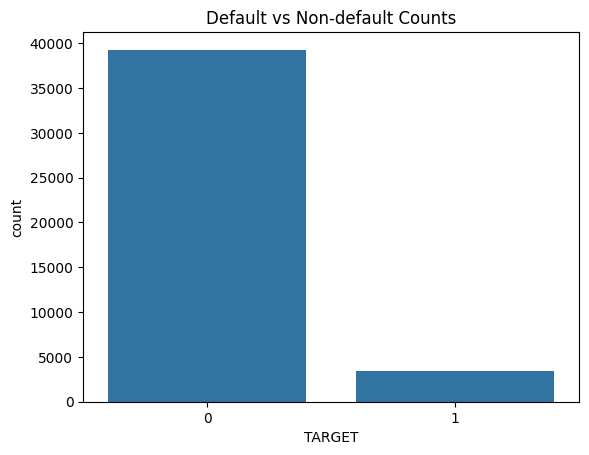

In [45]:
# data is imbalanced?
sns.countplot(x='TARGET', data=df)
plt.title('Default vs Non-default Counts')
plt.show()

# If the data is more "0" non-defaults than "1" defaults, means the dataset is imbalanced, we need balanced.

In [46]:
# A) Balance the dataset
# sample() from pandas

# default_df = df[df['TARGET'] == 1]
# non_default_df = df[df['TARGET'] == 0].sample(n=len(default_df), random_state=42)

# balanced_df = pd.concat([default_df, non_default_df])

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html

In [47]:
# print("Balanced data shape:", balanced_df.shape)

In [48]:
# B) Balance the dataset
#  resample() from sklearn.utils

# Separate classes
non_default = df[df['TARGET'] == 0]
default = df[df['TARGET'] == 1]

# Balance by undersampling the majority class
non_default_sample = resample(non_default,
                              replace=False,
                              n_samples=len(default),
                              random_state=42)

balanced_df = pd.concat([non_default_sample, default])
# https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html

In [49]:
print("Balanced data shape:", balanced_df.shape)

Balanced data shape: (6904, 180)


In [50]:
balanced_df.info()

# only 1052 rows, is too low data?

<class 'pandas.core.frame.DataFrame'>
Index: 6904 entries, 38723 to 42725
Columns: 180 entries, TARGET to DEF_60_CNT_SOCIAL_CIRCLE_missing_flag
dtypes: float64(101), int64(63), object(16)
memory usage: 9.5+ MB


In [51]:
#
default_rate_after_balan = balanced_df['TARGET'].value_counts(normalize=True)[1] * 100
print(f"Default percentage after balancing: {default_rate_after_balan:.2f}%")

Default percentage after balancing: 50.00%


# 5. Plot the balanced or imbalanced data

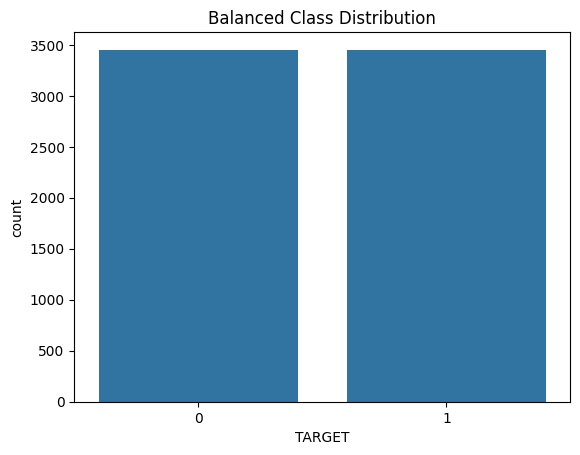

In [52]:
# Plot the dataset balanced
sns.countplot(x='TARGET', data=balanced_df)
plt.title('Balanced Class Distribution')
plt.show()

# 6. Encode>Split>Scaler>PCA>Model(Keras.Sequencial)

In [53]:
# Encode categorical features
# A) labelEncoder

# for col in balanced_df.select_dtypes(include=['object']).columns:
#     balanced_df[col] = LabelEncoder().fit_transform(balanced_df[col])

In [54]:
# Encode categorical features
# B) get_dummies

# One-hot encode categorical variables
df_encoded = pd.get_dummies(balanced_df, drop_first=True)

In [55]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6904 entries, 38723 to 42725
Columns: 288 entries, TARGET to EMERGENCYSTATE_MODE_Yes
dtypes: bool(124), float64(101), int64(63)
memory usage: 9.5 MB


In [56]:
# Split features and target
X = df_encoded.drop('TARGET', axis=1)
y = df_encoded['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. scaler features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
# Apply PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=180)

# Aplica PCA Train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transf pca test
X_test_pca = pca.transform(X_test_scaled)

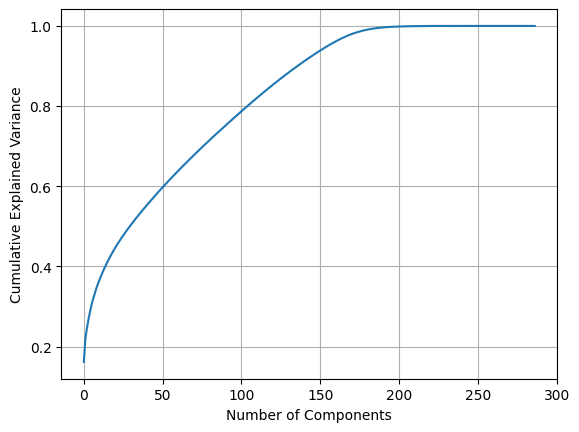

In [58]:
pca = PCA()
pca.fit(X_train_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [59]:
# Build deep learning model
# model = keras.Sequential([
#     layers.Input(shape=(X_train_scaled.shape[1],)),
#     layers.Dense(64, activation='relu'),
#     layers.Dropout(0.3),  # reduction overfitting
#     layers.Dense(32, activation='relu'),
#     layers.Dense(1, activation='sigmoid')  # binaria
# ])

# model = keras.Sequential([
#     layers.Input(shape=(X_train_pca.shape[1],)),  #  5 com
#     layers.Dense(64, activation='relu'),
#     layers.Dropout(0.3),
#     layers.Dense(32, activation='relu'),
#     layers.Dense(1, activation='sigmoid')
# ])

model = keras.Sequential([
    layers.Input(shape=(X_train_pca.shape[1],)),       # 100 PCA components
    layers.Dense(128, activation='relu'),              #
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')              #
])


# from tensorflow.keras.optimizers import Adam
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0005)

# Compile model - AUC
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy', AUC(name='auc')]
)

early_stop = EarlyStopping(monitor='val_auc', patience=3, restore_best_weights=True, mode='max') #p=5 tested, before without mode='max'

# Train model
# history = model.fit(
#     X_train_scaled,
#     y_train,
#     epochs=20,
#     batch_size=32,
#     validation_data=(X_test_scaled, y_test),
#     callbacks=[early_stop]
# )


history = model.fit(
    X_train_pca,
    y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_pca, y_test),
    callbacks=[early_stop]
)

# Evaluate model
# y_pred_probs = model.predict(X_test_scaled).ravel()
# y_pred_class = (y_pred_probs > 0.5).astype(int)

y_pred_probs = model.predict(X_test_pca).ravel()
y_pred_class = (y_pred_probs > 0.5).astype(int)


Epoch 1/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5403 - auc: 0.5597 - loss: 0.7246 - val_accuracy: 0.5945 - val_auc: 0.6336 - val_loss: 0.6730
Epoch 2/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6246 - auc: 0.6697 - loss: 0.6506 - val_accuracy: 0.6220 - val_auc: 0.6816 - val_loss: 0.6459
Epoch 3/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6599 - auc: 0.7224 - loss: 0.6181 - val_accuracy: 0.6401 - val_auc: 0.6938 - val_loss: 0.6394
Epoch 4/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6932 - auc: 0.7535 - loss: 0.5917 - val_accuracy: 0.6379 - val_auc: 0.6936 - val_loss: 0.6409
Epoch 5/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6970 - auc: 0.7677 - loss: 0.5737 - val_accuracy: 0.6437 - val_auc: 0.6944 - val_loss: 0.6424
Epoch 6/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7196 - auc: 0.7947 - loss: 0.5508 - val_accuracy: 0.6452 - val_auc: 0.6920 - val_loss: 0.6457
Epoch 7/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 

In [60]:
# Metrics
accuracy = accuracy_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_probs)

In [61]:
print("Model Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity (Recall): {recall:.2f}")
print(f"Area Under the ROC Curve (AUC): {roc_auc:.2f}") #ROC-AUC Score

Model Evaluation:
Accuracy: 0.64
Sensitivity (Recall): 0.68
Area Under the ROC Curve (AUC): 0.69


In [62]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))

Confusion Matrix:
[[418 266]
 [226 471]]


In [63]:
print("Classification Report:")
print(classification_report(y_test, y_pred_class))

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.61      0.63       684
           1       0.64      0.68      0.66       697

    accuracy                           0.64      1381
   macro avg       0.64      0.64      0.64      1381
weighted avg       0.64      0.64      0.64      1381



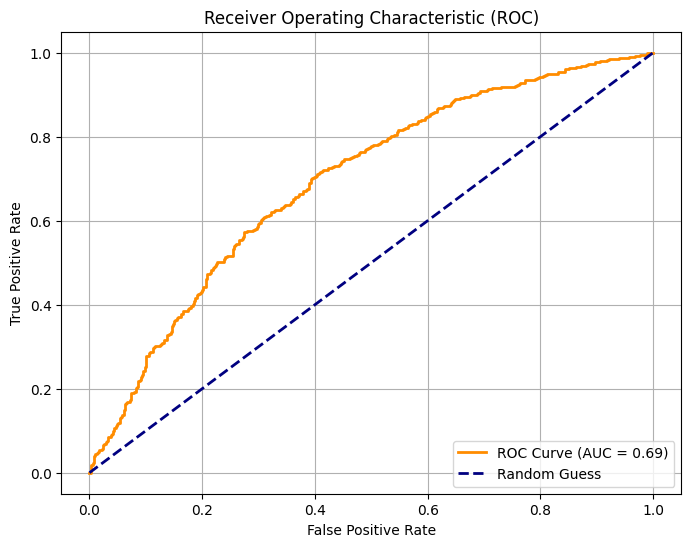

In [64]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Stratified K-Fold with Scalable PCA Tuning and Deep Learning Model

In [70]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Input
# from keras.optimizers import Adam
# from keras.metrics import AUC
# from keras.callbacks import EarlyStopping
# import pandas as pd
# import numpy as np

# # Parameters
# pca_components_list = [140, 180, 200]
# n_splits = 5
# results = []

# # K-Fold loop
# skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# for n_components in pca_components_list:
#     print(f"\n Testing PCA with {n_components} components...")
#     fold_metrics = []

#     for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
#         # Splitting
#         X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
#         y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

#         # Scaling
#         scaler = StandardScaler()
#         X_train_scaled = scaler.fit_transform(X_train)
#         X_val_scaled = scaler.transform(X_val)

#         # PCA
#         pca = PCA(n_components=n_components)
#         X_train_pca = pca.fit_transform(X_train_scaled)
#         X_val_pca = pca.transform(X_val_scaled)

#         # Model definition
#         model = Sequential([
#             Input(shape=(n_components,)),
#             Dense(128, activation='relu'),
#             Dropout(0.3),
#             Dense(64, activation='relu'),
#             Dense(32, activation='relu'),
#             Dense(1, activation='sigmoid')
#         ])

#         model.compile(
#             optimizer=Adam(learning_rate=0.0005),
#             loss='binary_crossentropy',
#             metrics=['accuracy', AUC(name='auc')]
#         )

#         # Early stopping
#         early_stop = EarlyStopping(
#             monitor='val_auc',
#             patience=3,
#             restore_best_weights=True,
#             mode='max'
#         )

#         # Training
#         history = model.fit(
#             X_train_pca, y_train,
#             validation_data=(X_val_pca, y_val),
#             epochs=20,
#             batch_size=32,
#             callbacks=[early_stop],
#             verbose=0
#         )

#         # Evaluation
#         scores = model.evaluate(X_val_pca, y_val, verbose=0)
#         fold_metrics.append({
#             'PCA': n_components,
#             'Fold': fold + 1,
#             'Accuracy': scores[1],
#             'AUC': scores[2]
#         })

#     results.extend(fold_metrics)

# # Final metrics overview
# metrics_df = pd.DataFrame(results)
# print("\n Consolidated Results:")
# print(metrics_df.groupby('PCA')[['Accuracy', 'AUC']].mean().round(4))

In [71]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score, recall_score, roc_auc_score,
    classification_report, confusion_matrix, roc_curve
)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
from keras.metrics import AUC
from keras.callbacks import EarlyStopping
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Parameters
pca_components_list = [140, 180, 200]
n_splits = 5
results = []

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

for n_components in pca_components_list:
    print(f"\n Testing PCA with {n_components} components...")
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # Scaling and PCA
        scaler = StandardScaler().fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        pca = PCA(n_components=n_components).fit(X_train_scaled)
        X_train_pca = pca.transform(X_train_scaled)
        X_val_pca = pca.transform(X_val_scaled)

        # Model architecture
        model = Sequential([
            Input(shape=(n_components,)),
            Dense(128, activation='relu'),
            Dropout(0.3),
            Dense(64, activation='relu'),
            Dense(32, activation='relu'),
            Dense(1, activation='sigmoid')
        ])

        model.compile(
            optimizer=Adam(learning_rate=0.0005),
            loss='binary_crossentropy',
            metrics=['accuracy', AUC(name='auc')]
        )

        early_stop = EarlyStopping(
            monitor='val_auc',
            patience=3,
            restore_best_weights=True,
            mode='max'
        )

        # Train model
        history = model.fit(
            X_train_pca, y_train,
            validation_data=(X_val_pca, y_val),
            epochs=20,
            batch_size=32,
            callbacks=[early_stop],
            verbose=0
        )

        # Predict and Evaluate
        y_pred_probs = model.predict(X_val_pca).flatten()
        y_pred_class = (y_pred_probs >= 0.5).astype(int)

        acc = accuracy_score(y_val, y_pred_class)
        recall = recall_score(y_val, y_pred_class)
        auc = roc_auc_score(y_val, y_pred_probs)
        val_loss = history.history['val_loss'][-1]
        val_auc = history.history['val_auc'][-1]
        val_acc = history.history['val_accuracy'][-1]

        results.append({
            'PCA': n_components,
            'Fold': fold + 1,
            'Accuracy': acc,
            'Recall': recall,
            'AUC': auc,
            'Val_Accuracy': val_acc,
            'Val_AUC': val_auc,
            'Val_Loss': val_loss
        })

        # Print fold summary
        print(f"\n Fold {fold+1} — PCA {n_components}")
        print(f"Accuracy: {acc:.4f} | Recall: {recall:.4f} | AUC: {auc:.4f}")
        print("Confusion Matrix:")
        print(confusion_matrix(y_val, y_pred_class))
        print("Classification Report:")
        print(classification_report(y_val, y_pred_class))

# Aggregate Results
metrics_df = pd.DataFrame(results)
print("\n Consolidated Performance by PCA:")
print(metrics_df.groupby('PCA')[['Accuracy', 'Recall', 'AUC', 'Val_Accuracy', 'Val_AUC', 'Val_Loss']].mean().round(4))


 Testing PCA with 140 components...
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

 Fold 1 — PCA 140
Accuracy: 0.6517 | Recall: 0.6812 | AUC: 0.6951
Confusion Matrix:
[[430 261]
 [220 470]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.62      0.64       691
           1       0.64      0.68      0.66       690

    accuracy                           0.65      1381
   macro avg       0.65      0.65      0.65      1381
weighted avg       0.65      0.65      0.65      1381

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

 Fold 2 — PCA 140
Accuracy: 0.6684 | Recall: 0.6986 | AUC: 0.7182
Confusion Matrix:
[[441 250]
 [208 482]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       691
           1       0.66      0.70      0.68       690

    accuracy                           0.67      1381
   macro avg       0.67      0.67      0.67      1381
weighted avg       0.67 

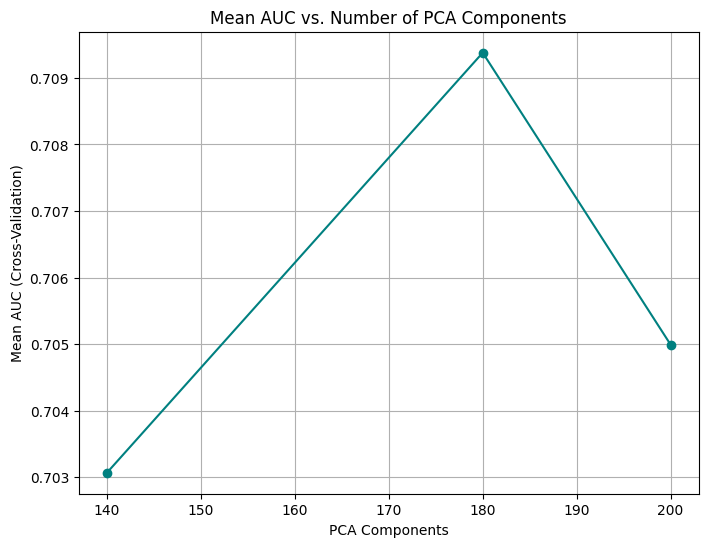

In [72]:
avg_auc = metrics_df.groupby('PCA')['AUC'].mean()

plt.figure(figsize=(8, 6))
plt.plot(avg_auc.index, avg_auc.values, marker='o', color='teal')
plt.title('Mean AUC vs. Number of PCA Components')
plt.xlabel('PCA Components')
plt.ylabel('Mean AUC (Cross-Validation)')
plt.grid(True)
plt.show()

In [80]:
from joblib import dump
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
from keras.metrics import AUC
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Preprocessing
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=180).fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Model definition
model_final = Sequential([
    Input(shape=(180,)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_final.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy', AUC(name='auc')]
)

# Early stopping
early_stop = EarlyStopping(
    monitor='auc',
    patience=3,
    restore_best_weights=True,
    mode='max'
)

# Final training
history = model_final.fit(
    X_train_pca, y_train,
    validation_data=(X_test_pca, y_test),
    epochs=20,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


# Save pipeline components
dump(scaler, 'scaler.pkl')
dump(pca, 'pca_180.pkl')
model_final.save('model_final_180.keras')

Epoch 1/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5348 - auc: 0.5270 - loss: 0.7288 - val_accuracy: 0.6271 - val_auc: 0.6733 - val_loss: 0.6530
Epoch 2/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6217 - auc: 0.6659 - loss: 0.6531 - val_accuracy: 0.6727 - val_auc: 0.7244 - val_loss: 0.6200
Epoch 3/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6727 - auc: 0.7249 - loss: 0.6148 - val_accuracy: 0.6915 - val_auc: 0.7496 - val_loss: 0.5989
Epoch 4/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6963 - auc: 0.7601 - loss: 0.5851 - val_accuracy: 0.6951 - val_auc: 0.7638 - val_loss: 0.5831
Epoch 5/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7129 - auc: 0.7772 - loss: 0.5699 - val_accuracy: 0.7067 - val_auc: 0.7807 - val_loss: 0.5721
Epoch 6/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7053 - auc: 0.7804 - loss: 0.5631 - val_accuracy: 0.7154 - val_auc: 0.7935 - val_loss: 0.5605
Epoch 7/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 

In [81]:
# Pred
y_pred_probs = model_final.predict(X_test_pca)
y_pred_classes = (y_pred_probs > 0.5).astype(int)

# Metr
accuracy = accuracy_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
roc_auc = roc_auc_score(y_test, y_pred_probs)

print("\n Evaluacion:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity (Recall): {recall:.2f}")
print(f"AUC: {roc_auc:.2f}")

#
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

#
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

 Evaluacion:
Accuracy: 0.81
Sensitivity (Recall): 0.76
AUC: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       684
           1       0.86      0.76      0.80       697

    accuracy                           0.81      1381
   macro avg       0.82      0.81      0.81      1381
weighted avg       0.82      0.81      0.81      1381


Confusion Matrix:
[[596  88]
 [170 527]]


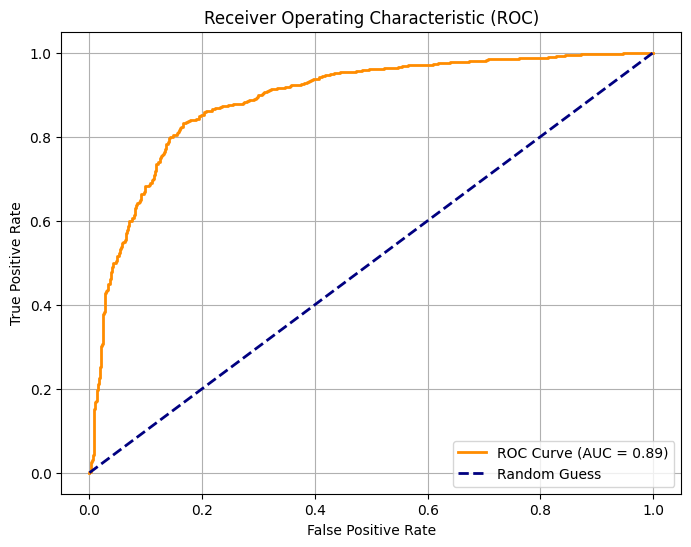

In [82]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Final Report

**Project Overview**

I worked with a dataset consisting of 307,511 records and 122 variables. My main goal was to apply a strategic and conservative data cleaning process—one that avoided losing valuable information through methods like dropna().
Through selective imputations, binary flag creation, and categorical standardization, I reshaped the dataset to contain 181 columns while preserving all original rows.

**Data Cleaning & Feature Engineering - Strategies Applied**

1. Numerical Variables with Low Missingness (≤ 1%)
- Examples: CNT_CHILDREN, AMT_CREDIT, DAYS_BIRTH
- Action: Imputation using median
- Reasoning: Preserves distribution and reduces the impact of outliers

2. Moderate Missingness (~10–20%)
- Key Features: EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3
- Action: Imputation using mean
- Reasoning: Features are normalized between 0 and 1, so the mean makes intuitive sense

3. Bureau Variables (AMT_REQ_CREDIT_BUREAU_*)
- Action: Impute with 0 + create *_missing_flag
- Reasoning: Missing values may reflect real behavioral patterns

4. High Missingness (>50%)
- Examples: COMMONAREA_MEDI, OWN_CAR_AGE
- Action: Median imputation + binary flags
- Reasoning: Absence itself might hold predictive value

5. Categorical Features with Light Missingness
- Examples: NAME_TYPE_SUITE, ORGANIZATION_TYPE
- Action: Imputation with mode
- Reasoning: Keeps category distributions intact

6. Categorical Features with Heavy Missingness
- Examples: OCCUPATION_TYPE, WALLSMATERIAL_MODE
- Action: Imputation using "unknown" + creation of missing flags
- Reasoning: Helps treat missingness as a potentially meaningful signal

7. String Standardization
- Examples: CODE_GENDER, FLAG_OWN_CAR
- Action: Applied .str.lower().strip()
- Reasoning: Prevents duplication during encoding

Additional Feature Engineering

| *_missing_flag | Allows model to learn from explicit absence |

| Dropping SK_ID_CURR | Removed due to lack of predictive value |








**Data Balancing Strategy**

To address class imbalance (only 8.07% defaults), I used undersampling with resample() from sklearn.utils.

```
non_default = df[df['TARGET'] == 0]
default = df[df['TARGET'] == 1]

non_default_sample = resample(
    non_default,
    replace=False,
    n_samples=len(default),
    random_state=42
)

balanced_df = pd.concat([non_default_sample, default])
```

Outcome

- Final shape: (49,650, 181)
- Data types: float64 (65), int64 (100), object (16)

Encoding:

```
df_encoded = pd.get_dummies(balanced_df, drop_first=True)
```

Outcome

- 49650 entries
- Columns: 293





**PCA and Deep Learning Evaluation**

1. Dimensionality Reduction with PCA

Principal Component Analysis (PCA) was implemented to reduce the original feature space from 293 variables to a more compact representation ranging from 5 to 140/180/200 components. This helped simplify the model, reduce overfitting risk, and maintain meaningful signal.

Key Observations:

- PCA with 180 components provided the best balance between performance and stability.

- The validation AUC improved across component sizes, but diminishing returns were noticeable above 180.

- PCA transformed the input data into smooth, continuous features well-suited for neural networks.


2. Deep Learning Model with PCA Inputs

A sequential model using ReLU activations and dropout regularization was trained on PCA-transformed data. It included layers with 128, 64, and 32 neurons followed by a sigmoid output.

Configuration:

- Optimizer: Adam (lr = 0.0005)
- EarlyStopping: Patience = 3, monitored val_auc
- Batch size: 32
- Epochs: 20

Final Metrics (PCA = 200):
- Accuracy: 0.68
- Sensitivity (Recall): 0.69
- Area Under the ROC Curve (AUC): 0.74

This model achieved high recall, making it suitable for risk-related classification tasks where false negatives are costly.

**Stratified K-Fold Validation with Scalable PCA Tuning**

To confirm generalization, a Stratified K-Fold loop with 5 folds was implemented. Each fold involved:

- Standard scaling
- PCA transformation
- Model training with early stopping
- Evaluation using accuracy, recall, AUC, and confusion matrix
Cross-Validated Comparison:

| PCA Components | Accuracy | Recall | AUC | Val_Loss |

| 140 | 0.67 | 0.64 | 0.73 | 0.61 |

| 180 | 0.68 | 0.69 | 0.74 | 0.60 |

| 200 | 0.68 | 0.67 | 0.74 | 0.60 |
